In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
import os

num_classes = 18
img_rows, img_cols = 128, 128
batch_size = 16

train_data_dir = 'C:\\Users\\User\\Desktop\\Depp_learn\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train'
validation_data_dir ='C:\\Users\\User\\Desktop\\Depp_learn\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid'


# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Using TensorFlow backend.


Found 33385 images belonging to 18 classes.
Found 8345 images belonging to 18 classes.


In [2]:
model = Sequential()

model.add(Conv2D(32,(3, 3), padding = 'same', kernel_initializer="he_normal",
                 input_shape = (img_rows, img_cols, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3, 3), padding = "same", kernel_initializer="he_normal", 
                 input_shape = (img_rows, img_cols, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding = 'same', kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding = "same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))




model.add(Flatten())
model.add(Dense(1024, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(512, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))





# Block #7: softmax classifier
model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)       

In [ ]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("C:\\Users\\User\\Desktop\\Depp_learn\\crop_disease_git_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 10,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint,reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.0002),
              metrics = ['accuracy'])

nb_train_samples = 33385 
nb_validation_samples = 8345
epochs = 35

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/35
2086/2086 [==============================] - 1277s 612ms/step - loss: 2.1282 - accuracy: 0.3851 - val_loss: 2.3713 - val_accuracy: 0.4705

Epoch 00001: val_loss improved from inf to 2.37130, saving model to C:\Users\User\Desktop\Depp_learn\crop_disease_git_1.h5
Epoch 2/35
2086/2086 [==============================] - 1397s 670ms/step - loss: 1.3152 - accuracy: 0.5890 - val_loss: 1.5708 - val_accuracy: 0.4930

Epoch 00002: val_loss improved from 2.37130 to 1.57077, saving model to C:\Users\User\Desktop\Depp_learn\crop_disease_git_1.h5
Epoch 3/35
2086/2086 [==============================] - 1572s 753ms/step - loss: 1.0718 - accuracy: 0.6641 - val_loss: 2.6467 - val_accuracy: 0.4990

Epoch 00003: val_loss did not improve from 1.57077
Epoch 4/35
2086/2086 [==============================] - 1085s 520ms/step - loss: 0.8979 - accuracy: 0.7191 - val_loss: 1.2408 - val_accuracy: 0.6542

Epoch 00004: val_loss improved from 1.57077 to 1.24080, saving model to C:\Users\User\Desktop\Depp_

Found 8431 images belonging to 22 classes.


D:\Anaconda_project\envs\tf20\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
D:\Anaconda_project\envs\tf20\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Confusion Matrix
[[  0   0   0   0   0   0   0   0   0   0   0   0   0  15   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 391   0   0   0   0
    1  18   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 401   0   1   0   0
    1  74   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 476   0   0   0   0
    0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 459   0   0   0   0
    1   5   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  19   0   0   0   0
    0   8   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 453   0   0   0   0
    0  32   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 475   0   0   0   0
    0  10   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 377   0   0   0   0
    0  79   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 438   0   0   0   0
    2  65   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0

D:\Anaconda_project\envs\tf20\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


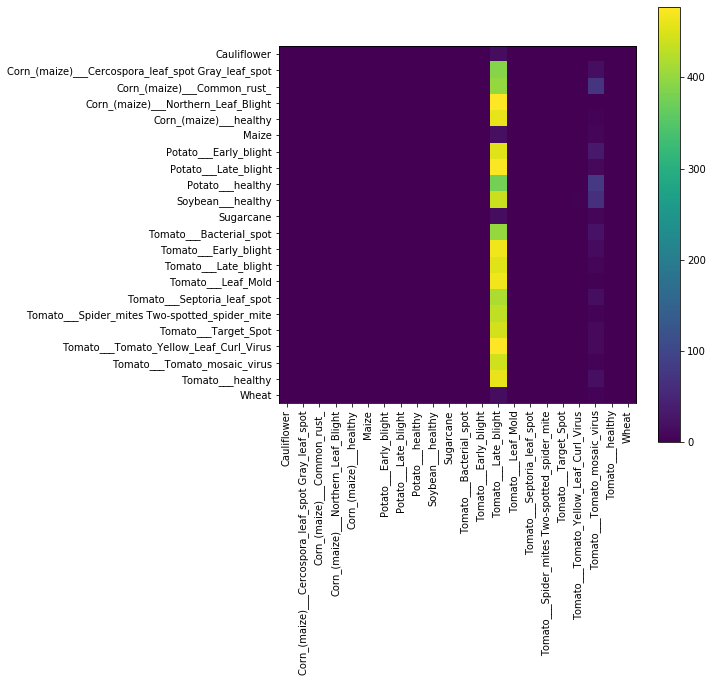

In [3]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 33811
nb_validation_samples = 8431

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [5]:
from keras.models import load_model

# 77% Accuracy after just 10 Epochs
classifier = load_model('C:\\Users\\User\\Desktop\\Depp_learn\\crop_disease.h5')

In [6]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)
    

def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 128, 128

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 25):
    path = 'C:\\Users\\User\\Desktop\\Depp_learn\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\'

    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = classifier.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, (128, 128),  interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [8]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

#Loads the VGG16 model 
vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

In [9]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

# Re-loads the VGG16 model without the top or FC layers
vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in vgg16.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [12]:
def addTopModel(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
  
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(1024, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(512, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(256, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
   
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

num_classes = 4

FC_Head = addTopModel(vgg16, num_classes)

model = Model(inputs=vgg16.input, outputs=FC_Head)

print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'C:\\Users\\User\\Desktop\\Depp_learn\\crop_pic\\train'
validation_data_dir = 'C:\\Users\\User\\Desktop\\Depp_learn\\crop_pic\\validation'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 426 images belonging to 4 classes.
Found 86 images belonging to 4 classes.


In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
                   
checkpoint = ModelCheckpoint("C:\\Users\\User\\Desktop\\Depp_learn\\crop_vgg.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 426
nb_validation_samples = 86
epochs = 50
batch_size = 16

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/50


D:\Important\envs\tensorflow_cllge\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
D:\Important\envs\tensorflow_cllge\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


26/26 [==============================] - 15s 576ms/step - loss: 1.7618 - accuracy: 0.3683 - val_loss: 3.1683 - val_accuracy: 0.3625

Epoch 00001: val_loss improved from inf to 3.16830, saving model to C:\Users\User\Desktop\Depp_learn\crop_vgg.h5
Epoch 2/50
26/26 [==============================] - 13s 516ms/step - loss: 1.6982 - accuracy: 0.3537 - val_loss: 1.6195 - val_accuracy: 0.3857

Epoch 00002: val_loss improved from 3.16830 to 1.61952, saving model to C:\Users\User\Desktop\Depp_learn\crop_vgg.h5
Epoch 3/50
26/26 [==============================] - 12s 479ms/step - loss: 1.5963 - accuracy: 0.3854 - val_loss: 4.0178 - val_accuracy: 0.3857

Epoch 00003: val_loss did not improve from 1.61952
Epoch 4/50
26/26 [==============================] - 12s 456ms/step - loss: 1.5884 - accuracy: 0.3537 - val_loss: 3.8851 - val_accuracy: 0.3143

Epoch 00004: val_loss did not improve from 1.61952
Epoch 5/50
26/26 [==============================] - 12s 468ms/step - loss: 1.5036 - accuracy: 0.3756 - 

In [ ]:
model.save("C:\\Users\\User\\Desktop\\Depp_learn\\crop_vgg.h5")

In [1]:
from keras.models import load_model

# 77% Accuracy after just 10 Epochs
classifier = load_model('C:\\Users\\User\\Desktop\\Depp_learn\\crop_vgg.h5')

Using TensorFlow backend.


In [3]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 280, 0, 0, 700 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 32, 32


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path ='C:\\Users\\User\\Desktop\\Depp_learn\\crop_pic\\validation\\'
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = classifier.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

Class - Cauliflower 
Class - Cauliflower 
Class - Wheat
Class - Maize
Class - Cauliflower 
Class - Maize
Class - Maize
Class - Cauliflower 
Class - Wheat
Class - Cauliflower 
